## Experiments on Benchmark Data

In [25]:
library(FCPS)
library(ggplot2)

source("bbvi_multimix.R")

# shared parameters
max_iter <- 1000
converge <- 0.01

## Old Faithful Data

The first benchmark dataset we're using is the `Old Faithful` dataset, which contains two variables: `eruptions` and `waiting`.

In [26]:
data(faithful)
head(faithful)

,eruptions,waiting
,<dbl>,<dbl>
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85
6,2.883,55


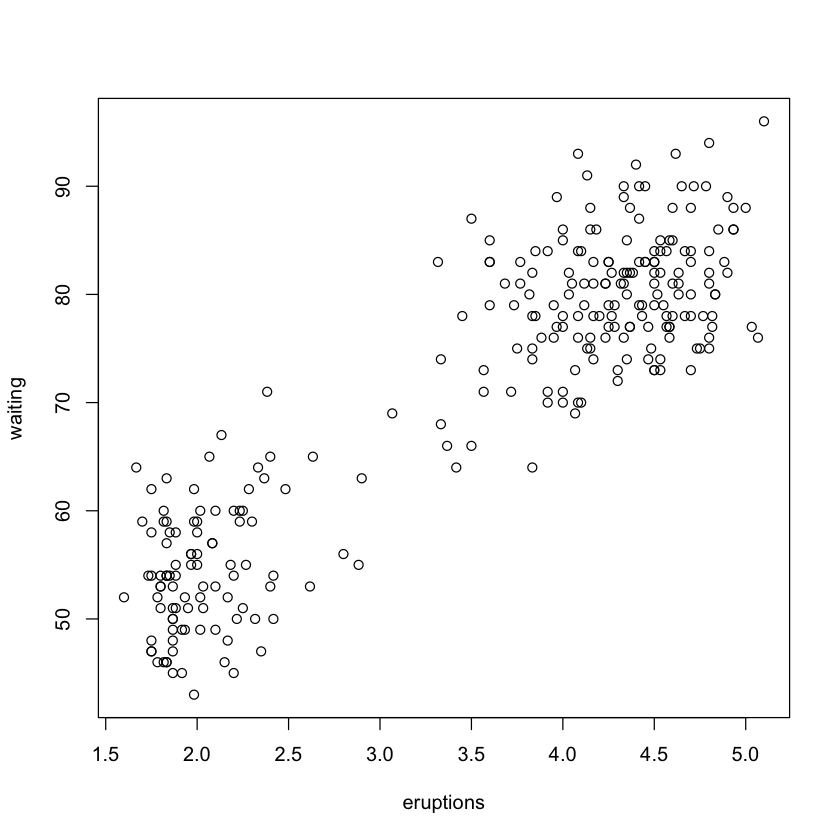

In [27]:
par(bg = "white")
plot(faithful)

In [29]:
faithful.priors <- list(
    m0 = c(3.0,70),
    S0 = diag(25, 400, nrow = 2, ncol = 2),
    Sigma = diag(100, 100, nrow = 2, ncol = 2)
)

faithful.rb <- bbvi_multimix(faithful, clusters = 2, mc_size = 500, max_iter = max_iter, priors = faithful.priors, learn_rate = rate_rmsprop(1, 0.9), method = "RB", verbose = TRUE, converge = converge)
faithful.js <- bbvi_multimix(faithful, clusters = 2, mc_size = 500, max_iter = max_iter, priors = faithful.priors, learn_rate = rate_rmsprop(1, 0.9), method = "JS+", verbose = TRUE, converge = converge)

BBVI-RB: Iteration 2 | lambda: 0.0852 | ELBO: -2246.8 | ELBO Change: 1

BBVI-RB: Iteration 3 | lambda: 0.0548 | ELBO: -2186.99 | ELBO Change: 0

BBVI-RB: Iteration 4 | lambda: 0.0609 | ELBO: -2127.65 | ELBO Change: 0

BBVI-RB: Iteration 5 | lambda: 0.0288 | ELBO: -2072.04 | ELBO Change: 0

BBVI-RB: Iteration 6 | lambda: 0.0572 | ELBO: -2067.89 | ELBO Change: 0



In [19]:
rbind(
    summary_multimix(faithful.rb),
    summary_multimix(faithful.js)    
)

method,iterations,time,ELBO,elpd,DIC
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
RB,5,1.3267811,-2072.040,-2093.557,4138.710
JS+,5,0.8059932,-2162.928,-2111.698,4185.957


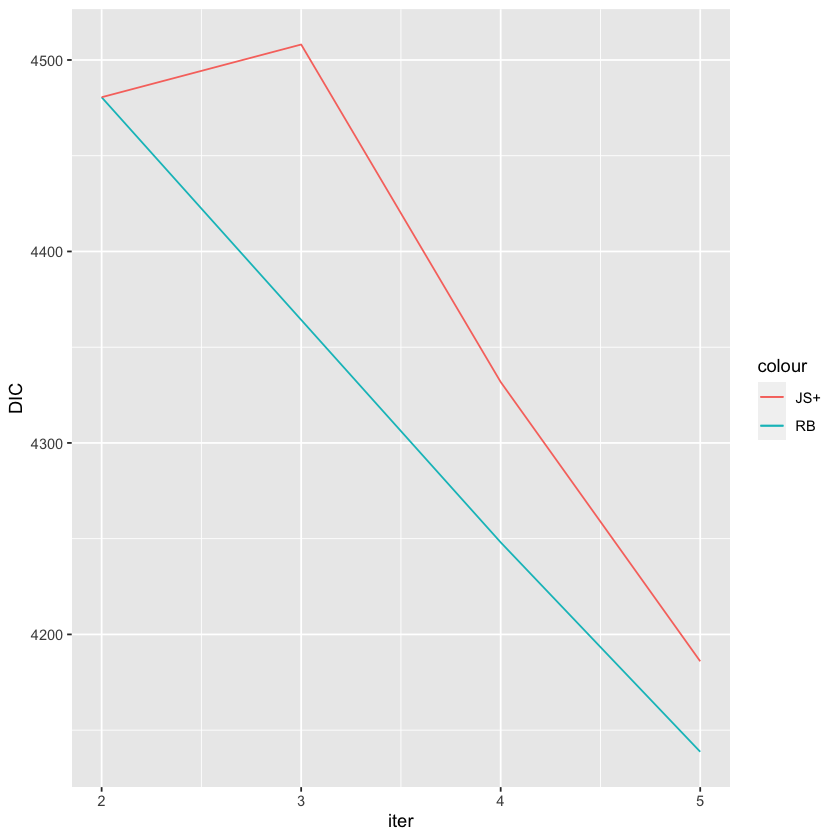

In [24]:
ggplot() +
    geom_line(data = faithful.rb$elbo, aes(x = iter, y = DIC, color = "RB")) + 
    geom_line(data = faithful.js$elbo, aes(x = iter, y = DIC, color = "JS+"))

## EngyTime

We use the `EnyTime` benchmark dataset provided in the `FPCS` library. 

In [30]:
data(EngyTime)
engytime <- EngyTime$Data

head(engytime)

,X1,X2
1,1.388261,2.076096
2,2.177247,3.102304
3,0.378645,5.307610
4,3.681732,1.622681
5,2.462861,2.777897
6,1.735954,3.827090


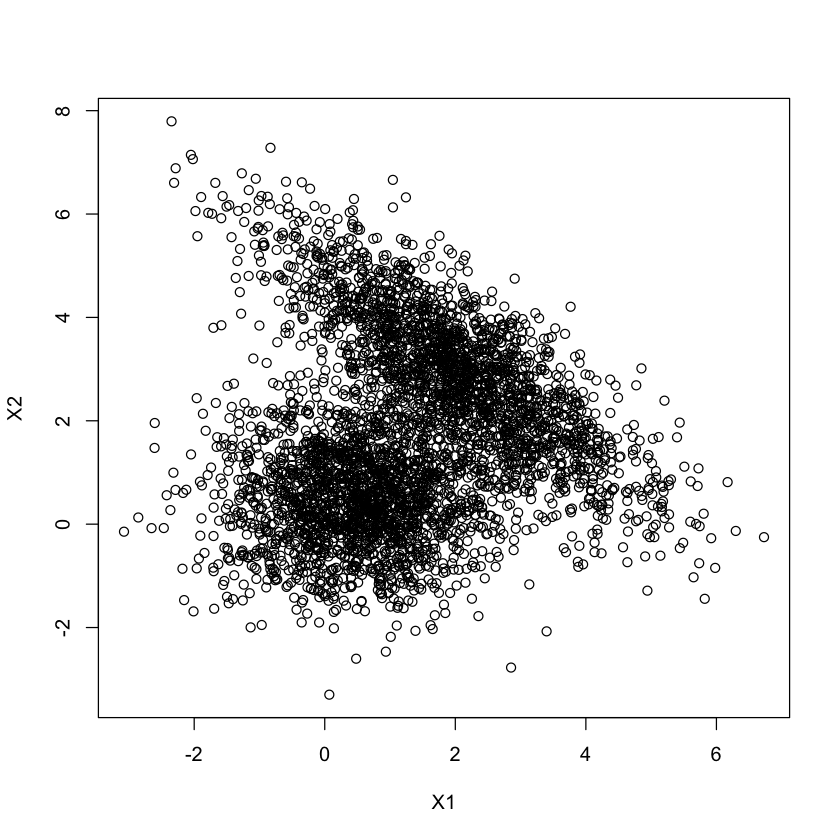

In [31]:
par(bg = "white")
plot(engytime)

In [32]:
engytime.priors <- list(
    m0 = c(0, 0),
    S0 = diag(4, 4, nrow = 2, ncol = 2),
    Sigma = diag(4, 4, nrow = 2, ncol = 2)
)

engytime.rb <- bbvi_multimix(engytime, clusters = 2, mc_size = 100, max_iter = max_iter, priors = engytime.priors, learn_rate = rate_rmsprop(1, 0.9), method = "RB", verbose = TRUE, converge = converge)
engytime.js <- bbvi_multimix(engytime, clusters = 2, mc_size = 100, max_iter = max_iter, priors = engytime.priors, learn_rate = rate_rmsprop(1, 0.9), method = "JS+", verbose = TRUE, converge = converge)

In [ ]:
rbind(
    summary_multimix(engytime.rb),
    summary_multimix(engytime.js)    
)

## Lsun3D

We use the `Lsun3D` benchmark dataset provided in the `FPCS` library. 

In [34]:
data(Lsun3D)

lsun3d <- Lsun3D$Data
head(lsun3d)

,X,Y,C
1,3.277701,0.814082,0.32657386
2,0.387577,0.176780,0.88804571
3,0.268546,0.582963,0.08098138
4,2.031145,0.244597,0.64392063
5,0.188677,0.461280,0.49663338
6,3.525472,0.265579,0.13821873


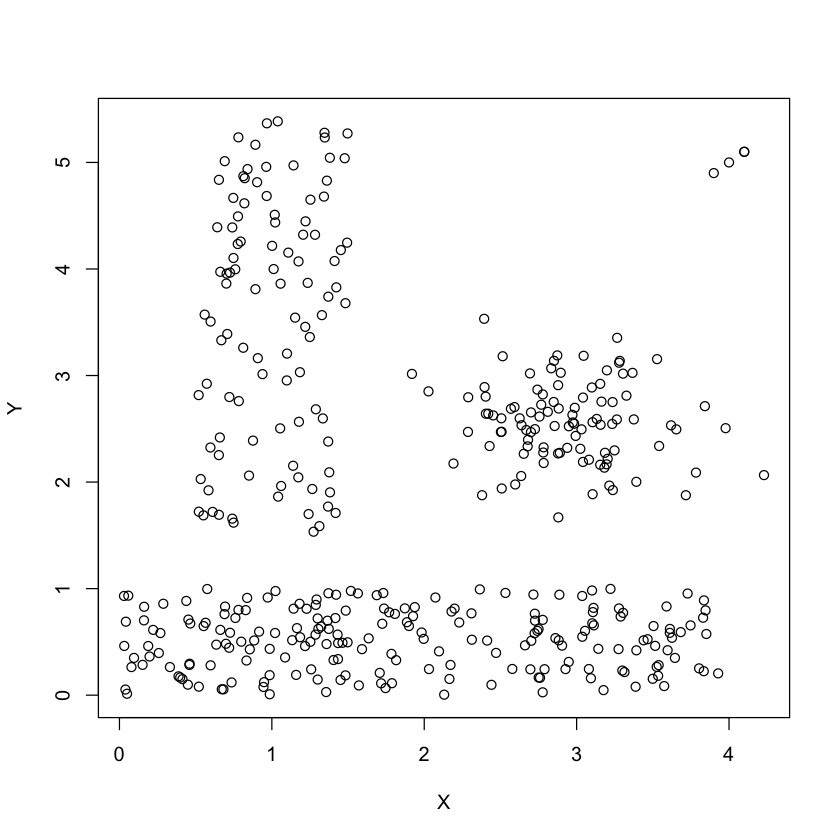

In [35]:
par(bg = "white")
plot(lsun3d[,1:2])

In [36]:
lsun3d.priors <- list(
    m0 = c(2, 2),
    S0 = diag(4, 4, nrow = 2, ncol = 2),
    Sigma = diag(4, 4, nrow = 2, ncol = 2)
)

lsun3d.rb <- bbvi_multimix(lsun3d[,1:2], clusters = 2, mc_size = 500, max_iter = max_iter, priors = lsun3d.priors, learn_rate = rate_rmsprop(1, 0.9), method = "RB", verbose = TRUE, converge = converge)
lsun3d.js <- bbvi_multimix(lsun3d[,1:2], clusters = 2, mc_size = 500, max_iter = max_iter, priors = lsun3d.priors, learn_rate = rate_rmsprop(1, 0.9), method = "JS+", verbose = TRUE, converge = converge)

BBVI-RB: Iteration 2 | lambda: 0.3638 | ELBO: -2659.38 | ELBO Change: 1

BBVI-RB: Iteration 3 | lambda: 0.3206 | ELBO: -2565.82 | ELBO Change: 0

BBVI-RB: Iteration 4 | lambda: 0.3055 | ELBO: -2055.42 | ELBO Change: 0

BBVI-RB: Iteration 5 | lambda: 0.2307 | ELBO: -1764.04 | ELBO Change: 0

Algorithm did not converge after 5 steps. Results may not be reliable.

BBVI-JS+: Iteration 2 | lambda: 0.3782 | ELBO: -2659.38 | ELBO Change: 1

BBVI-JS+: Iteration 3 | lambda: 0.3683 | ELBO: -2573.66 | ELBO Change: 0

BBVI-JS+: Iteration 4 | lambda: 0.4705 | ELBO: -2120.87 | ELBO Change: 0

BBVI-JS+: Iteration 5 | lambda: 0.5479 | ELBO: -1872.24 | ELBO Change: 0

Algorithm did not converge after 5 steps. Results may not be reliable.



In [37]:
rbind(
    summary_multimix(lsun3d.rb),
    summary_multimix(lsun3d.js)    
)

method,iterations,time,ELBO,elpd,DIC
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
RB,5,1.1236957,-1764.042,-1982.375,3527.103
JS+,5,0.7197497,-1872.237,-2083.766,3684.738
